In [1]:
import numpy as np
import pandas as pd

In [2]:
datasetCSV = pd.read_csv("../data/Chernobyl_wildfires2020_data/CherFires2020_EUconc_CUTbilin.csv").iloc[::5,:]

In [3]:
datasetUniqueLatAndLon = datasetCSV[["Latitude", "Longitude"]].drop_duplicates()

In [4]:
datasetUniqueLatAndLon

,Latitude,Longitude
0,40.140,44.160
5,48.796,16.475
15,47.505,9.726
20,47.075,15.451
30,47.260,11.357
...,...,...
4120,51.310,25.801
4160,51.311,26.093
4200,51.177,29.439
4205,47.810,31.220


In [5]:
# gpd.datasets.available

In [6]:
# min long/lat, max long/lat
clipRegion = [0,35,40,60]

longMin = datasetUniqueLatAndLon["Longitude"] > clipRegion[0]
latMin = datasetUniqueLatAndLon["Latitude"] > clipRegion[1]
longMax = datasetUniqueLatAndLon["Longitude"] < clipRegion[2]
latMax = datasetUniqueLatAndLon["Latitude"] < clipRegion[3]

datasetUniqueLatAndLon = datasetUniqueLatAndLon[longMin & longMax & latMin & latMax]

In [7]:
# import geopandas as gpd
# import matplotlib.pyplot as plt

# gdf = gpd.GeoDataFrame(data=datasetUniqueLatAndLon, geometry=gpd.points_from_xy(datasetUniqueLatAndLon["Longitude"],datasetUniqueLatAndLon["Latitude"]), crs="EPSG:4326")
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).clip(clipRegion)


# europe = gpd.read_file("../data/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp")
# europe = europe[europe['CONTINENT'] == 'Europe'].clip(clipRegion)

# fig, axes = plt.subplots(1,1,figsize=(18, 7))
# world.plot(ax=axes, color='lightgrey', edgecolor='black', legend=True) 
# gdf.plot(ax=axes, marker="o", color="blue")


# plt.xlabel("Zeměpisná šířka [˚]")
# plt.ylabel("Zeměpisná výška [˚]")
# plt.title("Měrné stanice v Evropě")
# plt.show()

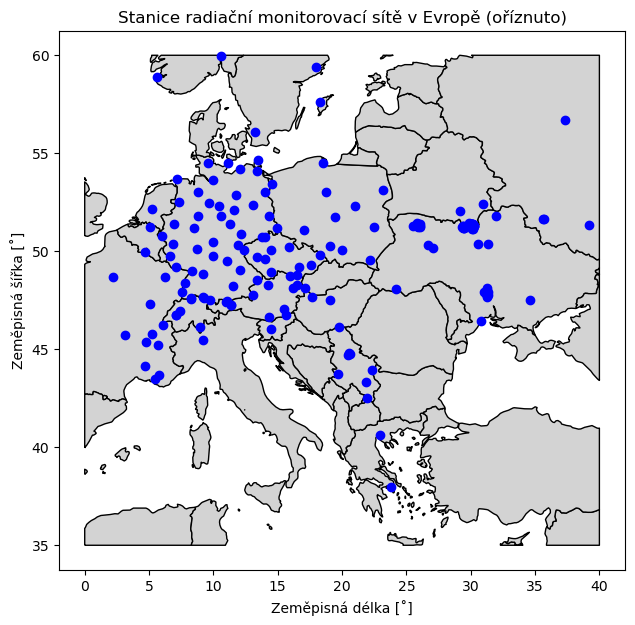

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.GeoDataFrame(data=datasetUniqueLatAndLon, geometry=gpd.points_from_xy(datasetUniqueLatAndLon["Longitude"],datasetUniqueLatAndLon["Latitude"]), crs="EPSG:4326")
europe = gpd.read_file("../data/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp")
europe = europe.clip(clipRegion)

fig, axes = plt.subplots(1,1,figsize=(18, 7))
europe.plot(ax=axes, color='lightgrey', edgecolor='black', legend=True) 
gdf.plot(ax=axes, marker="o", color="blue")


plt.xlabel("Zeměpisná délka [˚]")
plt.ylabel("Zeměpisná šířka [˚]")
plt.title("Stanice radiační monitorovací sítě v Evropě (oříznuto)")
plt.show()